In [ ]:
!gdown 1Ae_OebyChDVh_x8YOfGJzpQtUIYOWpaO

Downloading...
From: https://drive.google.com/uc?id=1Ae_OebyChDVh_x8YOfGJzpQtUIYOWpaO
To: /content/ThaiFruit.zip
100% 34.0M/34.0M [00:00<00:00, 107MB/s]


In [ ]:
!unzip ThaiFruit.zip

Archive:  ThaiFruit.zip
   creating: ThaiFruit/test/
   creating: ThaiFruit/test/champedak/
  inflating: ThaiFruit/test/champedak/11.jpg  
  inflating: ThaiFruit/test/champedak/31.jpg  
  inflating: ThaiFruit/test/champedak/35.jpg  
  inflating: ThaiFruit/test/champedak/38.jpg  
  inflating: ThaiFruit/test/champedak/57.jpg  
  inflating: ThaiFruit/test/champedak/62.jpg  
  inflating: ThaiFruit/test/champedak/63.jpg  
  inflating: ThaiFruit/test/champedak/68.jpg  
  inflating: ThaiFruit/test/champedak/70.jpg  
  inflating: ThaiFruit/test/champedak/79.jpg  
  inflating: ThaiFruit/test/champedak/82.jpg  
  inflating: ThaiFruit/test/champedak/88.jpg  
   creating: ThaiFruit/test/jackfruit/
  inflating: ThaiFruit/test/jackfruit/18.jpg  
  inflating: ThaiFruit/test/jackfruit/38.jpg  
  inflating: ThaiFruit/test/jackfruit/42.jpg  
  inflating: ThaiFruit/test/jackfruit/45.jpg  
  inflating: ThaiFruit/test/jackfruit/64.jpg  
  inflating: ThaiFruit/test/jackfruit/69.jpg  
  inflating: ThaiFruit/

In [ ]:
dataset_path="ThaiFruit"

In [ ]:
IMAGE_SIZE = 128
BATCH_SIZE = 64

In [ ]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
image_size = [128, 128]  # กำหนดขนาดรูปภาพที่ต้องการ

ds_train_ = image_dataset_from_directory(
    dataset_path + '/train',
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,  # ใช้ขนาดรูปภาพที่ต้องการ
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    dataset_path + '/val',
    labels='inferred',
    label_mode='categorical',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_test_ = image_dataset_from_directory(
    dataset_path + '/test',
    labels='inferred',
    label_mode='categorical',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

Found 170 files belonging to 2 classes.
Found 21 files belonging to 2 classes.
Found 23 files belonging to 2 classes.


In [ ]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_test = (
    ds_test_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

model = keras.Sequential([
    # CNN
    layers.Conv2D(32,3, padding='same', activation = 'relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),


    # Classification
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(2, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=50,
    verbose=1,
)

Epoch 1/50
3/3 [==============================] - 12s 243ms/step - loss: 1.5925 - accuracy: 0.5059 - val_loss: 0.7678 - val_accuracy: 0.4762
Epoch 2/50
3/3 [==============================] - 0s 47ms/step - loss: 0.7165 - accuracy: 0.4824 - val_loss: 0.6943 - val_accuracy: 0.4762
Epoch 3/50
3/3 [==============================] - 0s 45ms/step - loss: 0.6858 - accuracy: 0.6118 - val_loss: 0.6912 - val_accuracy: 0.4762
Epoch 4/50
3/3 [==============================] - 0s 39ms/step - loss: 0.6721 - accuracy: 0.5824 - val_loss: 0.6772 - val_accuracy: 0.5714
Epoch 5/50
3/3 [==============================] - 0s 39ms/step - loss: 0.6406 - accuracy: 0.7000 - val_loss: 0.6652 - val_accuracy: 0.5714
Epoch 6/50
3/3 [==============================] - 0s 37ms/step - loss: 0.5858 - accuracy: 0.7294 - val_loss: 0.6553 - val_accuracy: 0.6190
Epoch 7/50
3/3 [==============================] - 0s 37ms/step - loss: 0.5514 - accuracy: 0.6941 - val_loss: 0.6644 - val_accuracy: 0.6667
Epoch 8/50
3/3 [=========

In [ ]:
import numpy as np
from PIL import Image

def imageToArray(imageName):

  # Load the image and resize it to the desired dimensions
  image_path =imageName
  width, height = 128, 128  # Replace with the dimensions required by your model

  image = Image.open(image_path)
  image = image.resize((width, height))


  # Convert the image to a NumPy array and normalize the pixel values (if necessary)
  image_array = np.asarray(image)
  image_array = image_array / 255.0  # Normalize the pixel values between 0 and 1


  # Reshape the image array to match the input shape of your model
  image_array = image_array.reshape(1, width, height, 3)  # Assumes the input shape is (width, height, 3)

  return image_array

1/1 [==============================] - 0s 28ms/step
Image: ThaiFruit/test/champedak/38.jpg


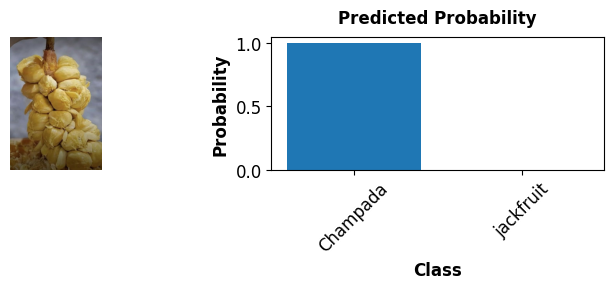

1/1 [==============================] - 0s 27ms/step
Image: ThaiFruit/test/champedak/35.jpg


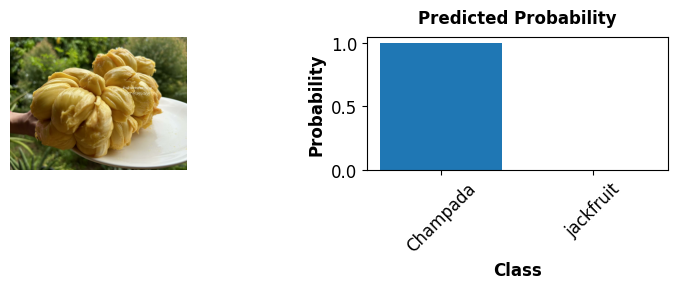

1/1 [==============================] - 0s 28ms/step
Image: ThaiFruit/test/jackfruit/38.jpg


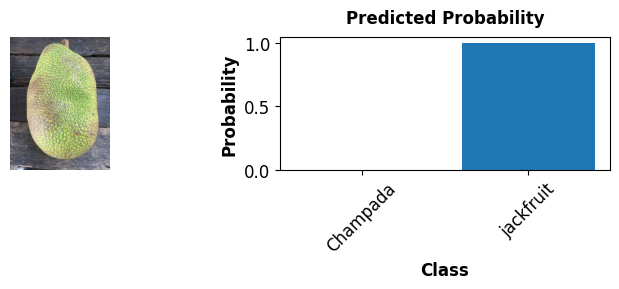

1/1 [==============================] - 0s 26ms/step
Image: ThaiFruit/test/champedak/88.jpg


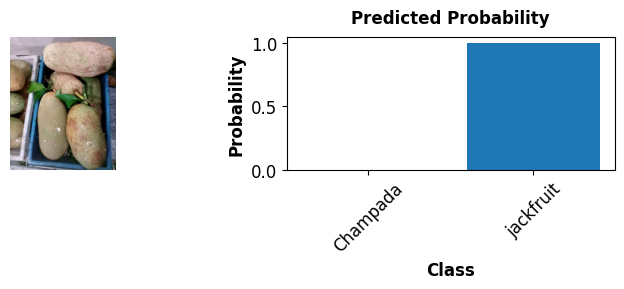

1/1 [==============================] - 0s 28ms/step
Image: ThaiFruit/test/champedak/79.jpg


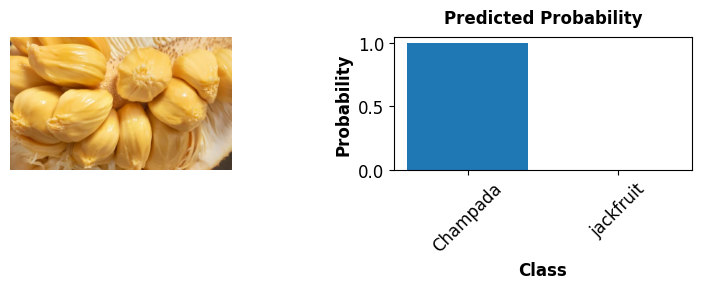

In [ ]:
import random

class_names = ['Champada', 'jackfruit']

randomlist = []
for i in range(0, 5):
    n = random.randrange(0, len(ds_test_.file_paths), 1)
    randomlist.append(n)

for i in randomlist:
    image_path = ds_test_.file_paths[i]
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image)
    image_array = tf.image.resize(image, (128, 128))
    image_array = tf.expand_dims(image_array, 0)
    preds = model.predict(image_array)
    print("Image: " + image_path)


    f, axarr = plt.subplots(1, 2, figsize=(8, 3), gridspec_kw={'width_ratios': [2, 1.5]})

    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image)
    axarr[0].imshow(tf.squeeze(image), cmap='gray')
    axarr[0].axis('off')

    axarr[1].bar(class_names, preds[0])
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    axarr[1].set_xlabel('Class', fontsize=12)
    axarr[1].set_ylabel('Probability', fontsize=12)
    axarr[1].set_title('Predicted Probability', fontsize=12)

    plt.show()